In [48]:
import numpy as np
import pandas as pd

def calculate_concentration_and_flux(D0, D1, initial_concentration, thickness, time_steps, delta_t, delta_z):
    # Number of spatial points
    n_points = int(thickness / delta_z) + 1
    
    # Initialize the concentration profile and diffusion coefficients
    concentration = np.zeros(n_points)
    diffusion_coefficients = np.zeros(n_points)
    
    # Setting the properties for the two materials
    halfway_point = n_points // 2
    concentration[:halfway_point] = initial_concentration
    diffusion_coefficients[:halfway_point] = D0
    diffusion_coefficients[halfway_point:] = D1

    # List to store data at each time step
    data = []

    # List to store concentration profiles at each time step
    concentration_during_time = []

    # Time stepping loop
    for t in range(time_steps):
        # Create a copy to store the new concentrations
        new_concentration = concentration.copy()

        # Loop over all points including boundaries (except the first and last points)
        for i in range(1, n_points - 1):
            # Apply the finite difference method with varying diffusion coefficients
            avg_diffusion_coefficient = 0.5 * (diffusion_coefficients[i-1] + diffusion_coefficients[i])
            new_concentration[i] = concentration[i] + avg_diffusion_coefficient * delta_t / delta_z**2 * (concentration[i-1] - 2*concentration[i] + concentration[i+1])
        

        # Calculate the flux at the boundary (z=0) using a central difference scheme
        flux = (concentration[1:halfway_point].mean() - new_concentration[1:halfway_point].mean()) / delta_t
        
        # Store time and flux at this time step
        data.append({
            'Time': t * delta_t,
            'Flux': flux
        })
        
        # Append the concentration profile at this time step to the list
        concentration_during_time.append(concentration.copy())
        
        # Update the concentration profile
        concentration = new_concentration.copy()
        concentration[halfway_point:] *= 0

    # Convert the list of concentration profiles to a NumPy array
    concentration_during_time = np.array(concentration_during_time)

    # Create a data frame from the data
    df = pd.DataFrame(data)

    # Return the data frame and the concentration array
    return df, concentration_during_time

# Usage:

data = []
for i in np.linspace(1e-3, 1e-1, 10):
    for c in [1e-2]:
        dft, concentr = calculate_concentration_and_flux(
                    D0=1e-8, D1=1e-3, initial_concentration=c, thickness=i, 
                    time_steps=10000, delta_t=1e-3, delta_z=i/10)
        data.append([dft.tail(1000).Flux.mean(), i, c])
        print(concentr[:, :5].std())
    

df = pd.DataFrame(data, columns=['Flux', 'Thickness', 'Concentration'])

0.0026769210360547673
0.00015634153695897896
4.43063391791335e-05
2.0445235968633645e-05
1.170699901433821e-05
7.570389624321761e-06
5.292826482238794e-06
3.907118524560599e-06
3.0019395068389683e-06
2.3783497698162693e-06


<Axes: xlabel='Thickness'>

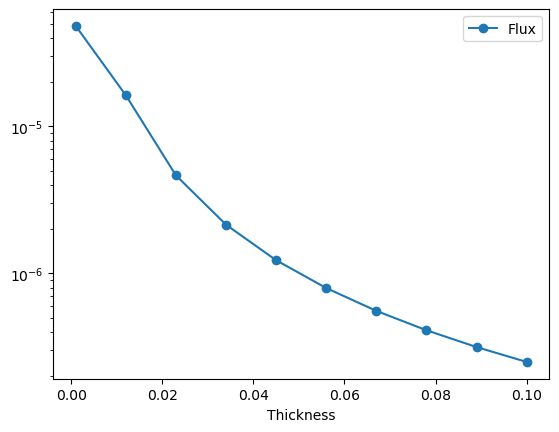

In [49]:
df.plot(x='Thickness', y='Flux', style='o-', logy=True)